In [2]:
from google.colab import files
uploaded = files.upload()
!unzip -q Palmer-Penguins-Dataset.zip

import pandas as pd
df = pd.read_csv("Palmer Penguins Dataset.csv")

# Display the first 5 rows of the dataset
df.head()

Saving Palmer-Penguins-Dataset.zip to Palmer-Penguins-Dataset.zip


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [3]:
# Show general information about the dataset (columns, non-null values, data types)
df.info()

# Generate descriptive statistics for numeric columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [4]:
# DATA CLEANSING
# 1. Check the data types of all columns
print("Data types before cleaning:")
print(df.dtypes)

Data types before cleaning:
species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object


In [5]:
# 2. Handle missing values
# Drop rows missing critical numeric measurements
df_cleaned = df.dropna(subset=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']).copy()

# Fill missing values in 'sex' column with 'Unknown'
df_cleaned['sex'] = df_cleaned['sex'].fillna('Unknown')

In [6]:
# 3. Convert object columns to categorical type where appropriate
for col in ['species', 'island', 'sex']:
    df_cleaned[col] = df_cleaned[col].astype('category')

In [7]:
# 4. Check for duplicate rows
num_duplicates = df_cleaned.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

# 5. Remove duplicates if any exist
if num_duplicates > 0:
    df_cleaned = df_cleaned.drop_duplicates()

Number of duplicate rows: 0


In [8]:
# 6. Final info after cleaning
print("\nData types after cleaning:")
print(df_cleaned.dtypes)
print("\nMissing values after cleaning:")
print(df_cleaned.isna().sum())
print("\nFinal shape of cleaned dataset:", df_cleaned.shape)


Data types after cleaning:
species              category
island               category
bill_length_mm        float64
bill_depth_mm         float64
flipper_length_mm     float64
body_mass_g           float64
sex                  category
year                    int64
dtype: object

Missing values after cleaning:
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

Final shape of cleaned dataset: (342, 8)


In [9]:
# View basic summary statistics for numerical columns
print("Summary statistics:")
print(df_cleaned.describe())

# View summary for categorical columns
print("\nSummary of categorical variables:")
print(df_cleaned.describe(include='category'))

# Check number of unique values in each column
print("\nNumber of unique values per column:")
print(df_cleaned.nunique())

# Check the unique values for categorical columns
print("\nUnique values for 'species':", df_cleaned['species'].unique())
print("Unique values for 'island':", df_cleaned['island'].unique())
print("Unique values for 'sex':", df_cleaned['sex'].unique())

# Check ranges for numeric columns
print("\nMinimum values:")
print(df_cleaned.min(numeric_only=True))
print("\nMaximum values:")
print(df_cleaned.max(numeric_only=True))

# Optional: view general data distribution
print("\nFirst few rows:")
print(df_cleaned.head())


Summary statistics:
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
count      342.000000     342.000000         342.000000   342.000000   
mean        43.921930      17.151170         200.915205  4201.754386   
std          5.459584       1.974793          14.061714   801.954536   
min         32.100000      13.100000         172.000000  2700.000000   
25%         39.225000      15.600000         190.000000  3550.000000   
50%         44.450000      17.300000         197.000000  4050.000000   
75%         48.500000      18.700000         213.000000  4750.000000   
max         59.600000      21.500000         231.000000  6300.000000   

              year  
count   342.000000  
mean   2008.029240  
std       0.817168  
min    2007.000000  
25%    2007.000000  
50%    2008.000000  
75%    2009.000000  
max    2009.000000  

Summary of categorical variables:
       species  island   sex
count      342     342   342
unique       3       3     3
top     Adelie  Bisc

<ipython-input-10-250f8f010fb3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='species', palette='pastel')


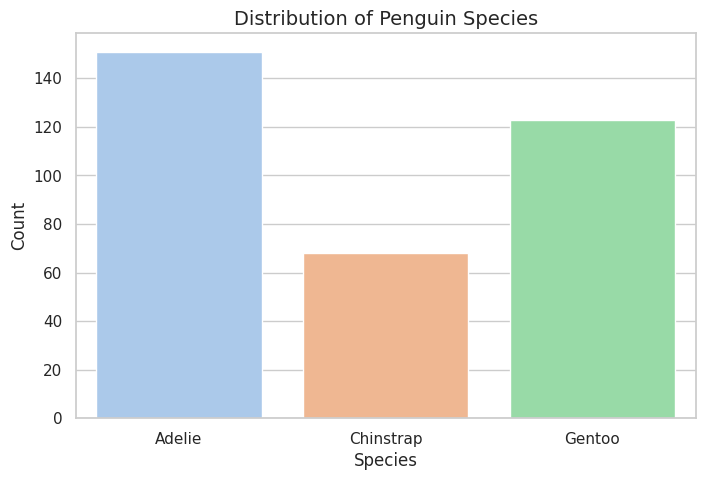

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style for better aesthetics
sns.set(style="whitegrid")

# Create a bar plot showing species distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df_cleaned, x='species', palette='pastel')

# Add title and labels
plt.title('Distribution of Penguin Species', fontsize=14)
plt.xlabel('Species')
plt.ylabel('Count')

# Show the plot
plt.show()

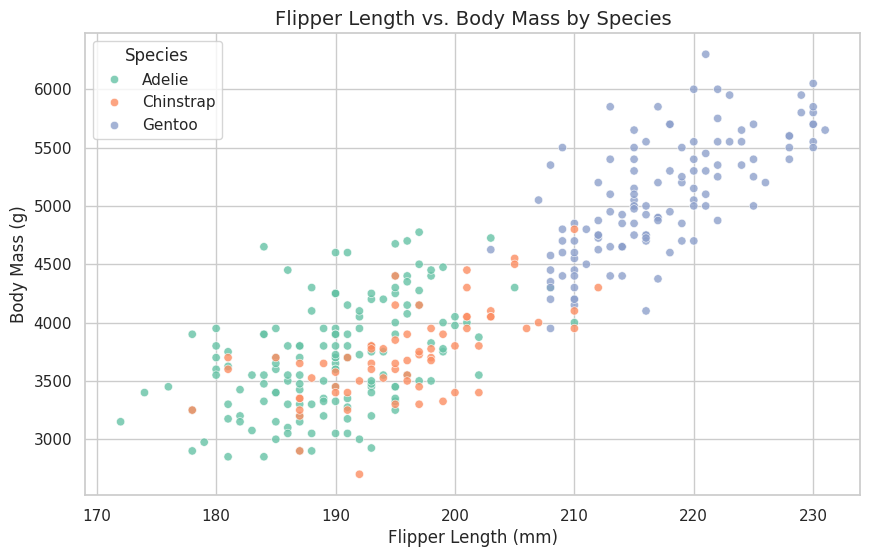

In [12]:
# Create a scatter plot of flipper length vs body mass, colored by species
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_cleaned,
    x='flipper_length_mm',
    y='body_mass_g',
    hue='species',
    palette='Set2',
    alpha=0.8
)

# Add title and axis labels
plt.title('Flipper Length vs. Body Mass by Species', fontsize=14)
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')

# Display legend
plt.legend(title='Species')

# Show the plot
plt.show()


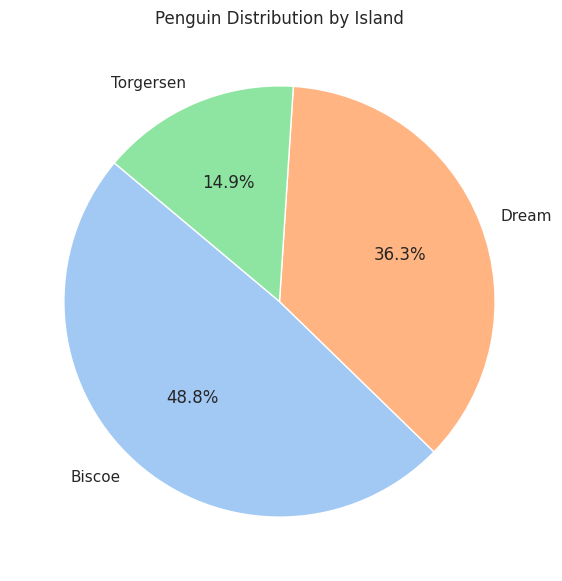

In [13]:
# Count the number of penguins on each island
island_counts = df_cleaned['island'].value_counts()

# Create a pie chart
plt.figure(figsize=(7, 7))
plt.pie(
    island_counts,
    labels=island_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel')[0:len(island_counts)]
)

# Add a title
plt.title('Penguin Distribution by Island')

# Display the plot
plt.show()


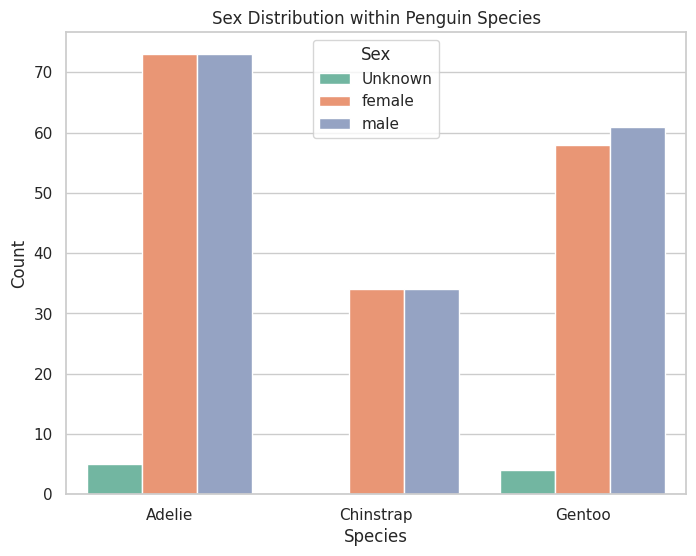

In [14]:
# Create grouped bar chart: sex distribution within each species
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df_cleaned,
    x='species',
    hue='sex',
    palette='Set2'
)

# Add title and axis labels
plt.title('Sex Distribution within Penguin Species')
plt.xlabel('Species')
plt.ylabel('Count')

# Display the legend
plt.legend(title='Sex')

# Show the plot
plt.show()

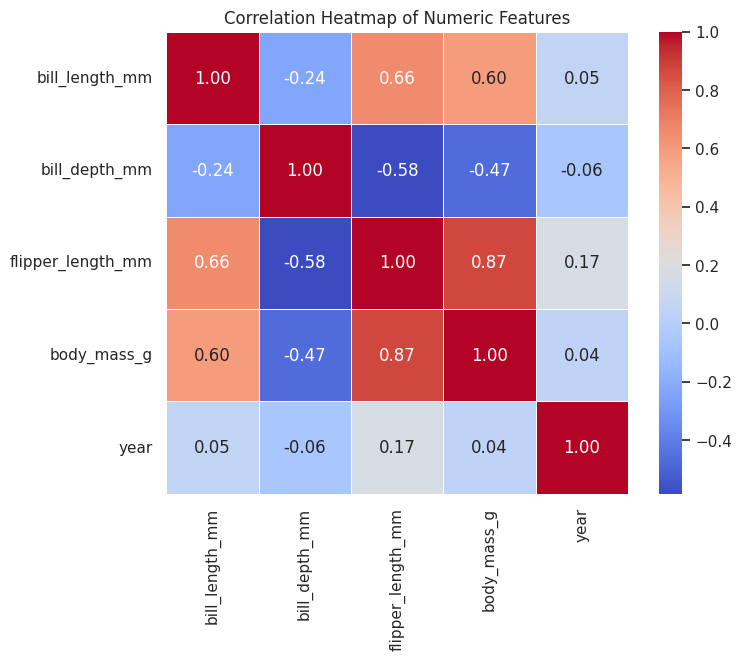

In [15]:
# Calculate the correlation matrix for numeric columns
corr_matrix = df_cleaned.corr(numeric_only=True)

# Create a heatmap to visualize correlations
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    square=True
)

# Add title
plt.title('Correlation Heatmap of Numeric Features')

# Show the plot
plt.show()

<ipython-input-16-f96486d8fe14>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-16-f96486d8fe14>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-16-f96486d8fe14>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-16-f96486d8fe14>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


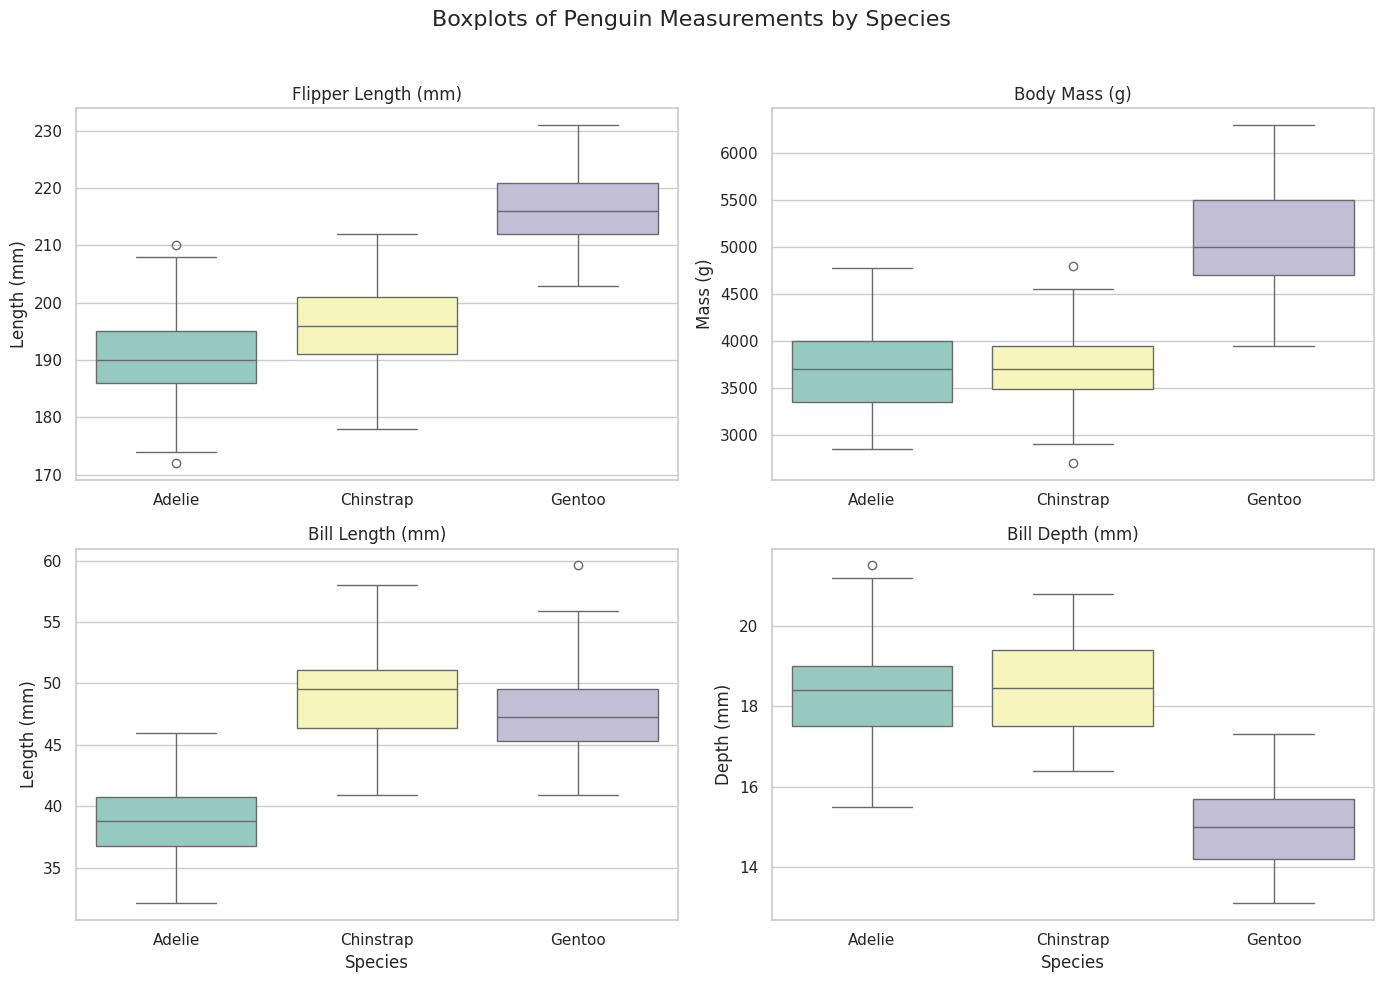

In [16]:
# Set up the figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Boxplots of Penguin Measurements by Species', fontsize=16)

# Flipper Length
sns.boxplot(
    data=df_cleaned,
    x='species',
    y='flipper_length_mm',
    palette='Set3',
    ax=axes[0, 0]
)
axes[0, 0].set_title('Flipper Length (mm)')
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Length (mm)')

# Body Mass
sns.boxplot(
    data=df_cleaned,
    x='species',
    y='body_mass_g',
    palette='Set3',
    ax=axes[0, 1]
)
axes[0, 1].set_title('Body Mass (g)')
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('Mass (g)')

# Bill Length
sns.boxplot(
    data=df_cleaned,
    x='species',
    y='bill_length_mm',
    palette='Set3',
    ax=axes[1, 0]
)
axes[1, 0].set_title('Bill Length (mm)')
axes[1, 0].set_xlabel('Species')
axes[1, 0].set_ylabel('Length (mm)')

# Bill Depth
sns.boxplot(
    data=df_cleaned,
    x='species',
    y='bill_depth_mm',
    palette='Set3',
    ax=axes[1, 1]
)
axes[1, 1].set_title('Bill Depth (mm)')
axes[1, 1].set_xlabel('Species')
axes[1, 1].set_ylabel('Depth (mm)')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # leave space for suptitle

# Show plots
plt.show()

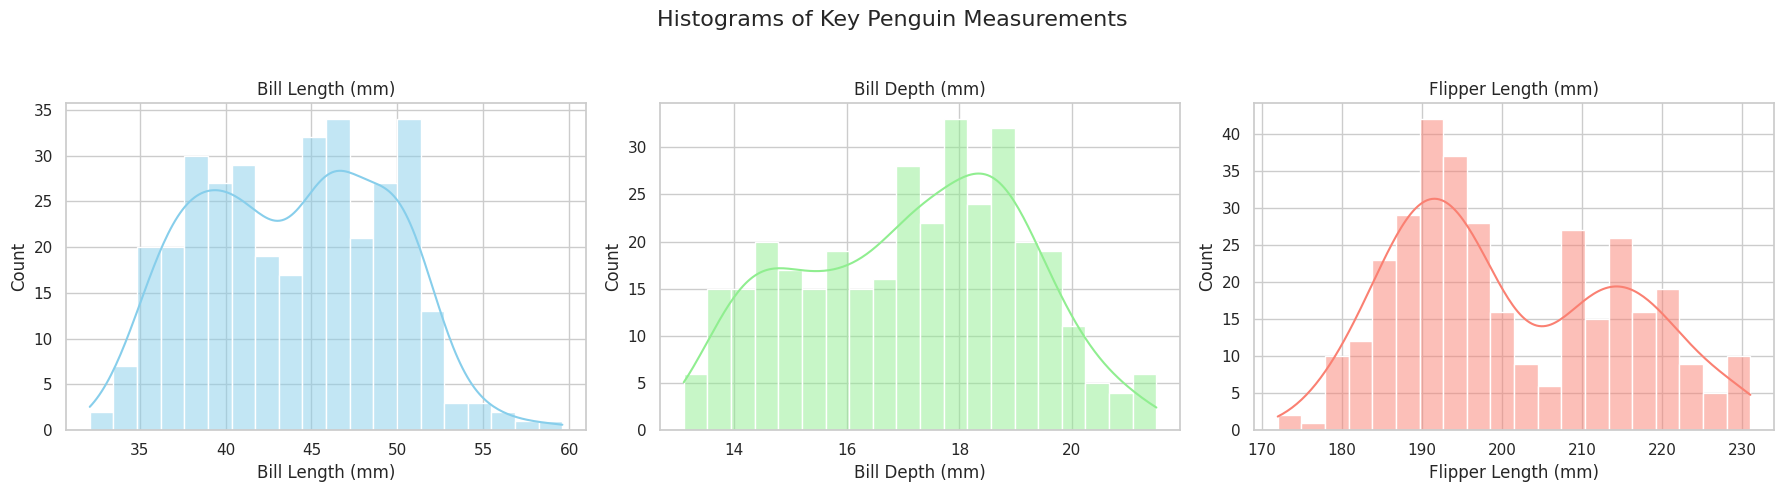

In [17]:
# Set up figure with 3 subplots (histograms)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Histograms of Key Penguin Measurements', fontsize=16)

# Histogram for Bill Length
sns.histplot(
    data=df_cleaned,
    x='bill_length_mm',
    bins=20,
    kde=True,
    color='skyblue',
    ax=axes[0]
)
axes[0].set_title('Bill Length (mm)')
axes[0].set_xlabel('Bill Length (mm)')
axes[0].set_ylabel('Count')

# Histogram for Bill Depth
sns.histplot(
    data=df_cleaned,
    x='bill_depth_mm',
    bins=20,
    kde=True,
    color='lightgreen',
    ax=axes[1]
)
axes[1].set_title('Bill Depth (mm)')
axes[1].set_xlabel('Bill Depth (mm)')
axes[1].set_ylabel('Count')

# Histogram for Flipper Length
sns.histplot(
    data=df_cleaned,
    x='flipper_length_mm',
    bins=20,
    kde=True,
    color='salmon',
    ax=axes[2]
)
axes[2].set_title('Flipper Length (mm)')
axes[2].set_xlabel('Flipper Length (mm)')
axes[2].set_ylabel('Count')

# Adjust layout so titles and labels don't overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show plots
plt.show()

<ipython-input-18-b3ce7135be43>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='species', palette='pastel', ax=axes[0, 0])
<ipython-input-18-b3ce7135be43>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='species', y='body_mass_g', palette='Set2', ax=axes[1, 1])


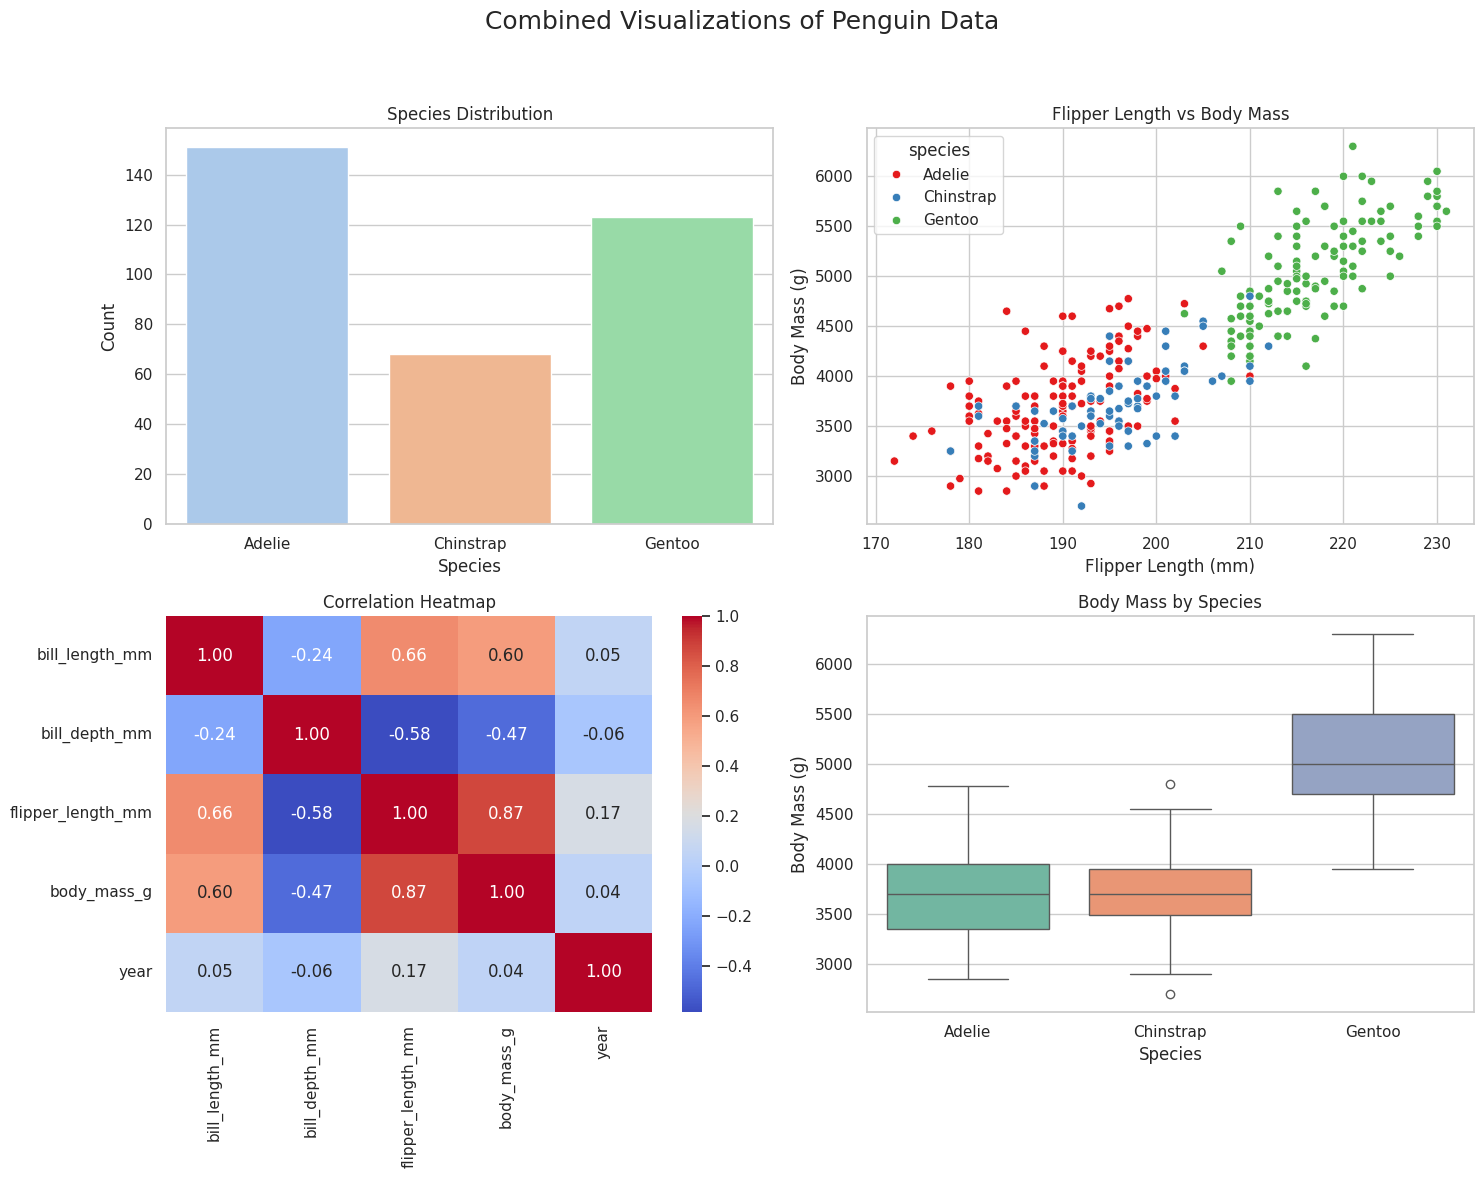

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Combined Visualizations of Penguin Data', fontsize=18)

# 1. Species distribution (bar chart)
sns.countplot(data=df_cleaned, x='species', palette='pastel', ax=axes[0, 0])
axes[0, 0].set_title('Species Distribution')
axes[0, 0].set_xlabel('Species')
axes[0, 0].set_ylabel('Count')

# 2. Scatter plot: Flipper length vs Body mass, colored by species
sns.scatterplot(data=df_cleaned, x='flipper_length_mm', y='body_mass_g', hue='species', palette='Set1', ax=axes[0, 1])
axes[0, 1].set_title('Flipper Length vs Body Mass')
axes[0, 1].set_xlabel('Flipper Length (mm)')
axes[0, 1].set_ylabel('Body Mass (g)')

# 3. Heatmap of correlations
corr_matrix = df_cleaned.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', ax=axes[1, 0])
axes[1, 0].set_title('Correlation Heatmap')

# 4. Boxplot of Body Mass by species
sns.boxplot(data=df_cleaned, x='species', y='body_mass_g', palette='Set2', ax=axes[1, 1])
axes[1, 1].set_title('Body Mass by Species')
axes[1, 1].set_xlabel('Species')
axes[1, 1].set_ylabel('Body Mass (g)')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space for suptitle
plt.show()

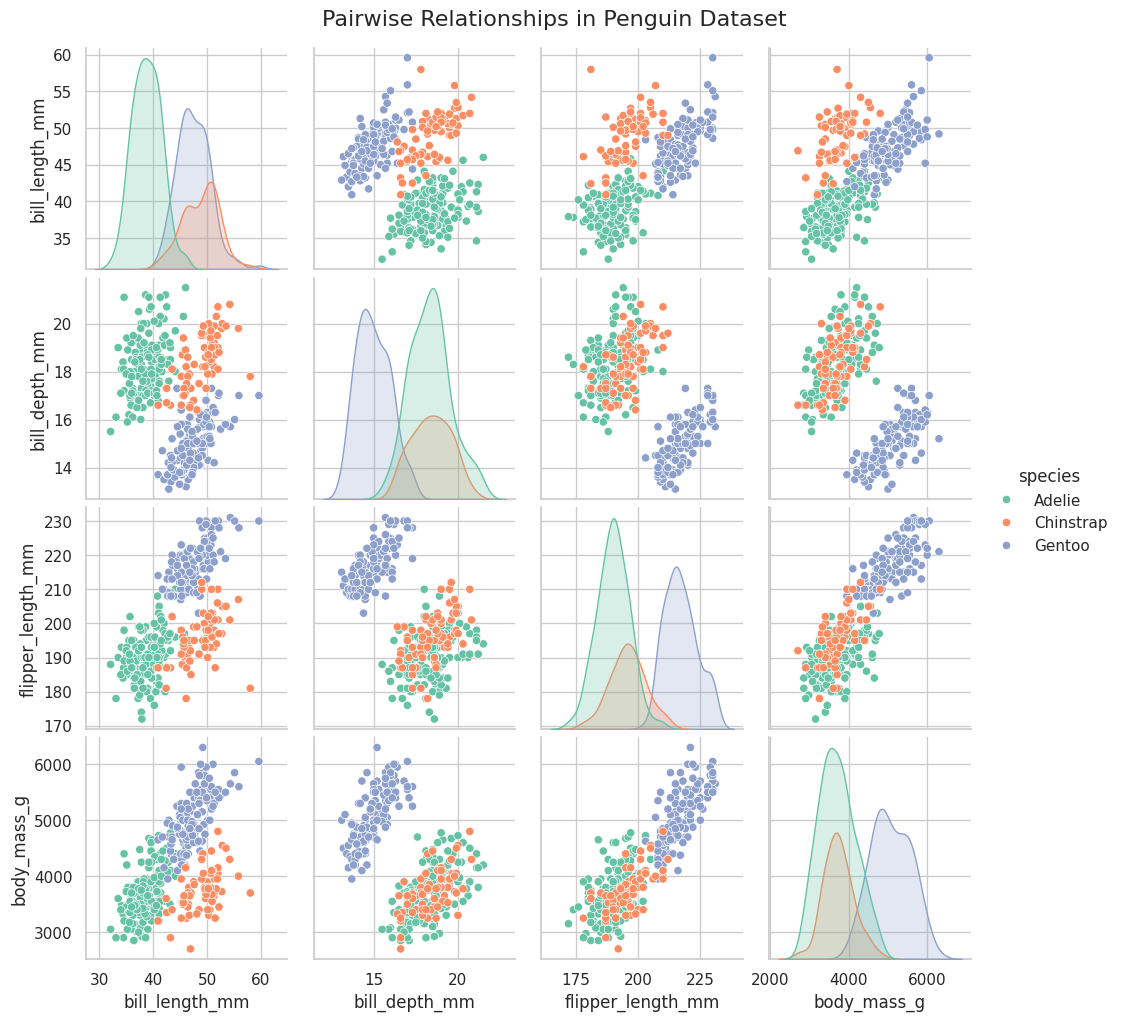

In [19]:
# Pairplot to visualize pairwise relationships between numeric features, colored by species
sns.pairplot(df_cleaned,
             vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'],
             hue='species',
             palette='Set2',
             diag_kind='kde',  # KDE plots on the diagonal instead of histograms
             height=2.5)

plt.suptitle('Pairwise Relationships in Penguin Dataset', y=1.02, fontsize=16)
plt.show()

Conclusion

The dataset includes three penguin species: Adelie, Chinstrap, and Gentoo. Adelie is the most common species in the sample.

The distribution of penguin sex is nearly balanced, but some missing values were replaced with "Unknown" to maintain data integrity.

Key measurements show that Gentoo penguins are generally larger — they have longer bills, longer flippers, and greater body mass. Adelie penguins tend to be smaller.

Correlation analysis revealed a strong positive relationship between flipper length and body mass — bigger penguins have longer flippers.

Visualizations confirm that species are well separated by their features — scatter plots and pairplots clearly show distinct grouping by species.

Data cleaning steps like removing missing values in important numeric columns and converting categorical variables ensured the analysis is accurate and reliable.

Overall, this analysis helps to better understand morphological differences between penguin species and can serve as a foundation for further biological studies.